In [109]:
#Load dataset using pandas library and display first few rows

import pandas as pd
df = pd.read_csv('/content/train_loan.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

#a).check for duplicates count in data


In [110]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the data

#b).check for missing values


In [111]:
#gives an idea about count of missing values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [112]:
print(round(df.isnull().mean()*100,2))

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


# % of missing values
* 0-1 - dropna(), imputation
* 1-40- imputation - mean, median, mode
* 40-100 - drop the column

#Handle missing values

In [113]:
#Categorical Columns -- Mode Imputation
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [114]:
#Numerical Column -- Mean Imputation
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


*   Using mean could generate unrealistic loan tenures that are not offered by banks. Mode ensures that missing values are replaced with a commonly occurring loan term.

*   Mean imputation would produce fractional values that have no real-world meaning, whereas mode preserves the categorical nature of the Credit_History(0,1).



In [115]:
#Mode imputation -- Loan Amount Term, Credit History

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [116]:
#verify once more to see if the missing values are resolved

print(round(df.isnull().mean()*100,2))

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


#c).Outlier Detection

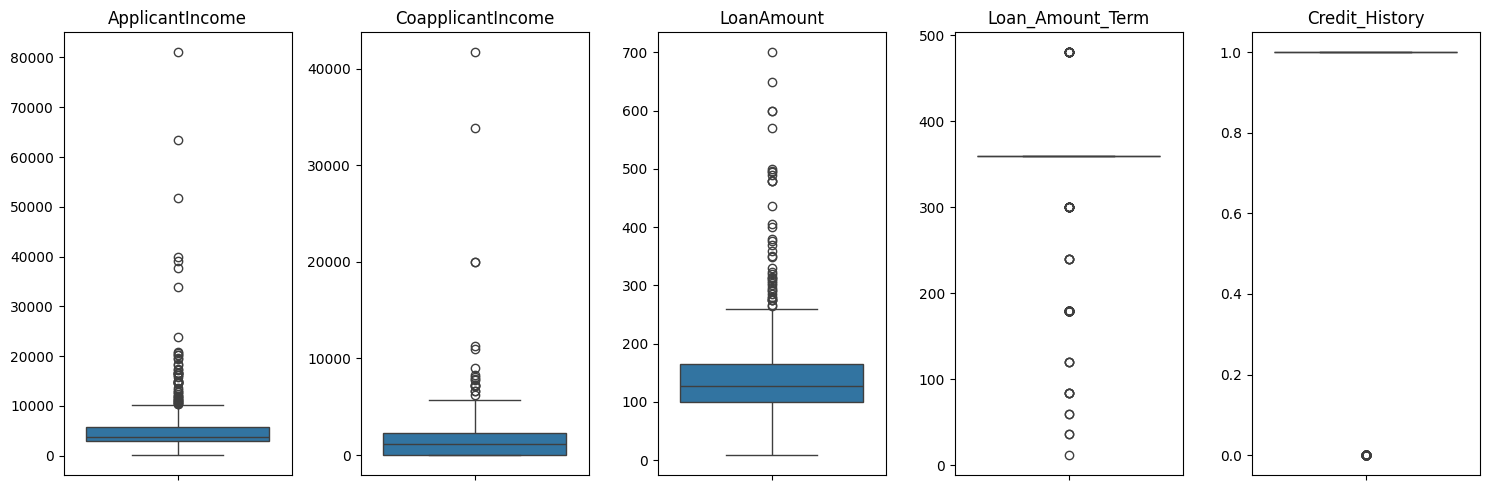

In [117]:
#boxplot to check outlier presence in the data

import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [118]:
#statistical report of dataset
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


*   ApplicantIncome, CoapplicantIncome - heavily right skewed due large variation in Income(valid in real-world)

*   LoanAmount - Highly right skewed

In [119]:
#we use IQR for Loan Amount .

import numpy as np

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Capping outliers
df['LoanAmount'] = np.where(df['LoanAmount'] > upper, upper,
      np.where(df['LoanAmount'] < lower, lower, df['LoanAmount']))


In [120]:
#capping for Applicant Income & Coapplicant Income
num_cols = ['ApplicantIncome', 'CoapplicantIncome']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


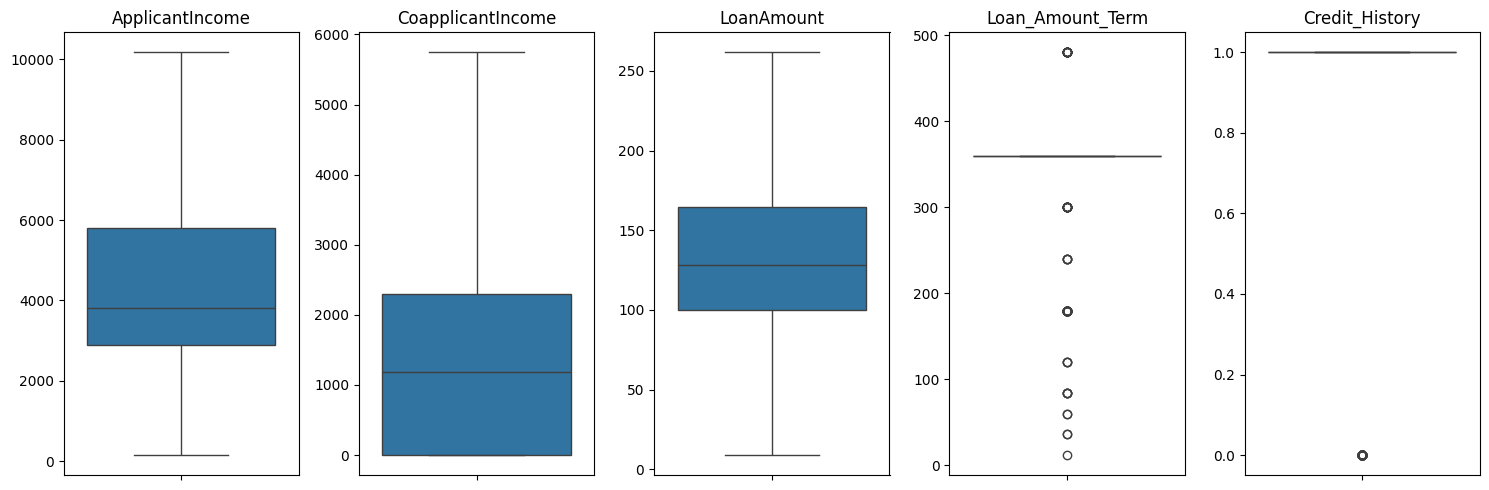

In [121]:
#boxplot to check outlier presence in the data

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()



1.   Credit_History has values 0,1. No concept of outliers .

2.   Loan_Amount_Term - valid loan durations in real -life.



#d).Encoding

In [122]:
#Identify categorical column
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [123]:
#Label Encoding for data with minimum cardinality
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [124]:
#One-Hot Encoding (Multi-category variables)

df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)


In [125]:
print(df.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0           5849.0   
1  LP001003       1        1          0              0           4583.0   
2  LP001005       1        1          0              1           3000.0   
3  LP001006       1        1          1              0           2583.0   
4  LP001008       1        0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Property_Area_Semiurban  Property_Area_Urban  Dependents_1  \
0            1                    False           

#e).Feature Scaling

In [126]:
#We scale numerical features so all are on the same scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [127]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    bool   
 12  Property_Area_Urban      614 non-null    bool   
 13  Dependents_1             614 non-null    bool   
 14  Dependents_2             6

In [128]:
print(df.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0         0.497164   
1  LP001003       1        1          0              0        -0.013767   
2  LP001005       1        1          0              1        -0.652632   
3  LP001006       1        1          1              0        -0.820924   
4  LP001008       1        0          0              0         0.558104   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.874587   -0.168041             360.0             1.0   
1           0.054395   -0.168041             360.0             1.0   
2          -0.874587   -1.280462             360.0             1.0   
3           0.578025   -0.311579             360.0             1.0   
4          -0.874587    0.065209             360.0             1.0   

   Loan_Status  Property_Area_Semiurban  Property_Area_Urban  Dependents_1  \
0            1                    False           

In [129]:
print(df.describe())

           Gender     Married   Education  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000  614.000000     614.000000     6.140000e+02   
mean     0.817590    0.653094    0.218241       0.133550     1.764784e-16   
std      0.386497    0.476373    0.413389       0.340446     1.000815e+00   
min      0.000000    0.000000    0.000000       0.000000    -1.802831e+00   
25%      1.000000    0.000000    0.000000       0.000000    -7.020702e-01   
50%      1.000000    1.000000    0.000000       0.000000    -3.247241e-01   
75%      1.000000    1.000000    0.000000       0.000000     4.753707e-01   
max      1.000000    1.000000    1.000000       1.000000     2.241532e+00   

       CoapplicantIncome    LoanAmount  Loan_Amount_Term  Credit_History  \
count       6.140000e+02  6.140000e+02        614.000000      614.000000   
mean        9.257886e-17  1.012581e-16        342.410423        0.855049   
std         1.000815e+00  1.000815e+00         64.428629        0.352339   
mi